## 목표
- **로지스틱 회귀(Logistic Regression)**를 사용하여 분류 문제를 해결합니다.
- **Iris 데이터셋**을 활용하여 `Iris Virginica` 품종을 분류하는 모델을 구현합니다.

## 단계별 과제

### 1. 데이터 준비
1. `sklearn.datasets.load_iris`를 사용하여 데이터를 로드합니다.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

iris = load_iris()

2. 데이터의 구조를 이해하기 위해 주요 정보를 출력하세요:
   - 특징(feature)의 이름
   - 타깃(target)의 이름
   - 데이터의 크기


In [ ]:
#data_set의 key 확인하기
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
#1.데이터 준비
X = iris.data[:, 3 :]

print(f"특성 이름:  {iris.feature_names}")
print(f"타깃 이름: {iris.target_names}")
print(f"데이터 크기: {X.shape}")

특성 이름:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
타깃 이름: ['setosa' 'versicolor' 'virginica']
데이터 크기: (150, 1)


In [ ]:
#iris data의 feature_names, target_names, data.shape 출력하기
print(f"특성 이름: {iris.feature_names}")
print(f"타겟 이름: {iris.target_names}")
print(f"데이터크기: {iris.data.shape}")

특성 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
타겟 이름: ['setosa' 'versicolor' 'virginica']
데이터크기: (150, 4)


3. `Iris Virginica` 품종 여부를 예측하기 위해 타깃 데이터를 이진화하세요:
   - `target == 2`를 1로, 나머지는 0으로 변환

In [ ]:
# Iris Virginica 품종 여부를 예측하기 위해 타깃 데이터를 이진화
Y = target_binary = (iris.target == 2).astype(int)

print(f"기존 타겟 데이터\n{iris.target} \n")
print(f"이진화된 타겟 데이터\n  {target_binary}")

기존 타겟 데이터
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] 

이진화된 타겟 데이터
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


### 2. 데이터 분할



1. 데이터를 **훈련 세트(80%)**와 **테스트 세트(20%)**로 분할한 후, 훈련 세트와 테스트 세트의 크기를 출력하세요.
2. `train_test_split` 함수를 사용하고, `random_state=42`로 고정하세요.

In [ ]:
feature, target = iris.data, iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f"훈련세트 크기: {X_train.shape}")
print(f"테스트세트 크기:{X_test.shape}")

훈련세트 크기: (120, 1)
테스트세트 크기:(30, 1)


### 3. 모델 학습 /  예측 및 평가

1. `LogisticRegression` 클래스를 사용하여 모델을 정의하세요.

In [ ]:
log_reg = LogisticRegression()

2. 훈련 데이터를 사용하여 모델을 학습시키세요.

In [ ]:
log_reg.fit(X_train, Y_train)

LogisticRegression()

3. 테스트 데이터를 사용하여 예측을 수행하세요.

In [ ]:
pred = log_reg.predict(X_test)
print(f"예측 결과: {pred}")

예측 결과: [0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0]


4. 모델의 **정확도(accuracy)**를 계산하세요.
   - `accuracy_score`를 사용하세요.

In [ ]:
acc = accuracy_score(Y_test, pred)
print(f"정확도: {acc}")

정확도: 1.0


### 4. 결정 경계 시각화


1. **꽃잎 너비(petal width)** 값을 기반으로 결정 경계를 시각화하세요.
2. \(X\)의 값을 0부터 3까지 1000개의 점으로 나눠 예측 확률을 계산하세요.


In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

3. 결정 경계를 그래프로 표시하고, 그래프에 다음 정보를 출력하세요:
   - `Iris Virginica` 확률 곡선.
   - 결정 경계(세로선).

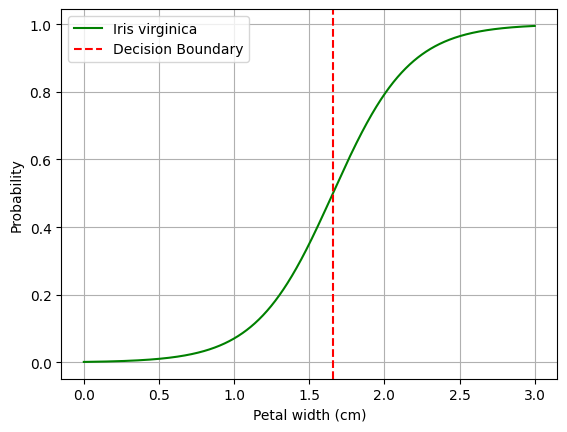

In [ ]:
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.axvline(x=decision_boundary, color="r", linestyle="--", label="Decision Boundary")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend()
plt.grid()
plt.show()